In [22]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

In [23]:
# Load the dataset
X = pd.read_csv("Heart.csv")
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [24]:
x1 = X['chol'].values
x2 = X['trestbps'].values

In [25]:
# Reshape the data into a 2D array
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

In [26]:
# Code for Expectation Maximization (Gaussian Mixture Model - GMM)
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

GaussianMixture(n_components=3)

In [27]:
# Get EM predictions
em_predictions = gmm.predict(X)

In [28]:
# Print EM results
print("\nEM Predictions:")
print(em_predictions)
print("Mean:\n", gmm.means_)
print("\nCovariances:\n", gmm.covariances_)


EM Predictions:
[0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 0 0 0 1 0 0 2 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 1 2 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 2 0 1 0 0 1 0 1 2 1 1 1
 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 2 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0]
Mean:
 [[219.29607835 126.25800946]
 [273.8335549  137.89313144]
 [313.10214417 138.93347759]]

Covariances:
 [[[ 1.03484782e+03 -1.80149685e+00]
  [-1.80149685e+00  1.83976093e+02]]

 [[ 1.40341670e+03 -5.11721949e+01]
  [-5.11721949e+01  4.11440069e+02]]

 [[ 1.05661235e+04 -6.31274029e+02]
  [-6.31274029e+02  1.49863976e+02]]]


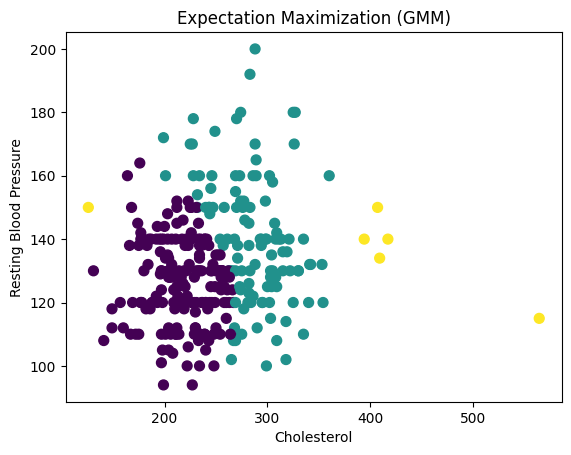

In [29]:
# Plot the EM clustering results
plt.title('Expectation Maximization (GMM)')
plt.scatter(X[:, 0], X[:, 1], c=em_predictions, s=50)
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')
plt.show()

In [30]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(n_clusters=3)

In [31]:
# Print KMeans results
print("KMeans Cluster Centers:\n", kmeans.cluster_centers_)
print("KMeans Cluster Labels:\n", kmeans.labels_)

KMeans Cluster Centers:
 [[286.         134.26612903]
 [212.32947977 129.56069364]
 [425.16666667 139.83333333]]
KMeans Cluster Labels:
 [1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 0 1 0 1 1 1 2 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1
 1 2 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0
 1 1 0 0 1 1 1 0 0 0 2 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 0 2 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 2 1 0 1 1 0 1 0 2 1 0 0
 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1]


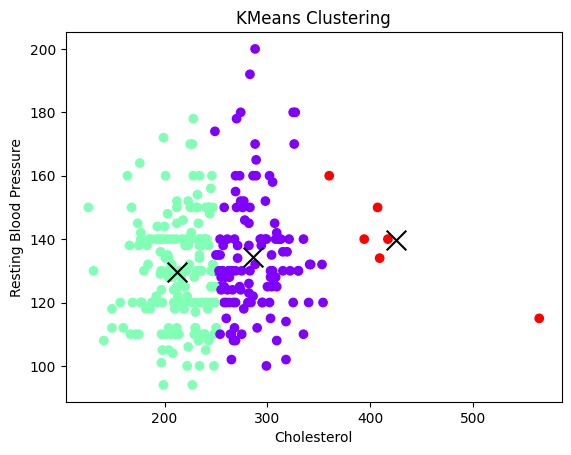

In [32]:
# Plot the KMeans clustering results
plt.title('KMeans Clustering')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', s=200)
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')
plt.show()